## MELBOURNE HOUSING

Sumber Data : https://drive.google.com/file/d/1ptfLP18cAUGs7ZwAx1CzwGIIki0CTiBu/view?usp=sharing

Melbourne is currently experiencing a housing bubble, (some experts say it may burst soon).

### FEATURES DESCRIPTION

**Suburb**: Suburb

**Address**: Address

**Rooms**: Number of rooms

**Price**: Price in Australian dollars

**Method:**
- S - property sold;
- SP - property sold prior;
- PI - property passed in;
- PN - sold prior not disclosed;
- SN - sold not disclosed;
- NB - no bid;
- VB - vendor bid;
- W - withdrawn prior to auction;
- SA - sold after auction;
- SS - sold after auction price not disclosed.
- N/A - price or highest bid not available.

**Type:**
- br - bedroom(s);
- h - house,cottage,villa, semi,terrace;
- u - unit, duplex;
- t - townhouse;
- dev site - development site;
- o res - other residential.

**SellerG**: Real Estate Agent

**Date**: Date sold

**Distance**: Distance from CBD in Kilometres

**Regionname**: General Region (West, North West, North, North east …etc)

**Propertycount**: Number of properties that exist in the suburb.

**Bedroom2** : Scraped # of Bedrooms (from different source)

**Bathroom**: Number of Bathrooms

**Car**: Number of carspots

**Landsize**: Land Size in Metres

**BuildingArea**: Building Size in Metres

**YearBuilt**: Year the house was built

**CouncilArea**: Governing council for the area

**Lattitude**: Self explanitory

**Longtitude**: Self explanitory

### IMPORT LIBRARIES

In [1]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

import warnings
warnings.filterwarnings("ignore")

### DATA QUALITY CHECKING

In [2]:
# load data
df = pd.read_csv("Melbourne_housing_FULL.csv")

In [3]:
# check head
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [4]:
# check tail
df.tail()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0
34856,Yarraville,3 Tarrengower St,2,h,1020000.0,PI,RW,24/02/2018,6.3,3013.0,...,1.0,0.0,250.0,103.0,1930.0,Maribyrnong City Council,-37.81810,144.89351,Western Metropolitan,6543.0


In [5]:
# check shape
df.shape

(34857, 21)

In [6]:
# check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [7]:
# check values of columns
df1 = []
for i in df.columns:
    df1.append([i, df[i].isna().sum(), df[i].nunique(), df[i].drop_duplicates().values])

df2 = pd.DataFrame(df1, columns=["column", "null values", "unique number", "values"])
df2

,column,null values,unique number,values
0,Suburb,0,351,"[Abbotsford, Airport West, Albert Park, Alphin..."
1,Address,0,34009,"[68 Studley St, 85 Turner St, 25 Bloomburg St,..."
2,Rooms,0,12,"[2, 3, 4, 1, 5, 6, 7, 8, 10, 9, 12, 16]"
3,Type,0,3,"[h, u, t]"
4,Price,7610,2871,"[nan, 1480000.0, 1035000.0, 1465000.0, 850000...."
5,Method,0,9,"[SS, S, VB, SP, PI, SN, W, PN, SA]"
6,SellerG,0,388,"[Jellis, Biggin, Rounds, Nelson, Collins, Ding..."
7,Date,0,78,"[3/09/2016, 3/12/2016, 4/02/2016, 4/03/2017, 4..."
8,Distance,1,215,"[2.5, 13.5, 3.3, 6.4, 13.8, 11.1, 6.3, 5.9, 11..."
9,Postcode,1,211,"[3067.0, 3042.0, 3206.0, 3078.0, 3018.0, 3025...."


## DATA PREPROCESSING

### MISSING VALUES IDENTIFICATION

In [8]:
# check missing values
df.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

### MISSING VALUES HANDLING

#### PRICE

In [9]:
print("Jumlah missing value :", df["Price"].isna().sum())
print("Presentase missing value :", round(df["Price"].isna().sum()/len(df)*100, 2), "%")

Jumlah missing value : 7610
Presentase missing value : 21.83 %


In [10]:
df_null = df[df["Price"].isna()]
df_not_null = df[df["Price"].notna()]

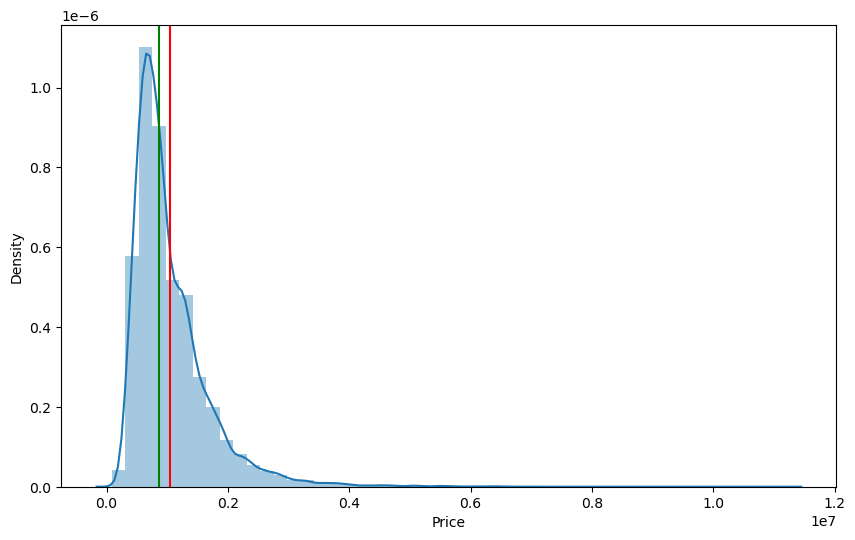

In [10]:
plt.figure(figsize=(10,6))
sns.distplot(df["Price"])
plt.axvline(df["Price"].mean(), color="red")
plt.axvline(df["Price"].median(), color="green")
plt.show()

In [11]:
df_not_null.groupby(["Type", "Rooms"], as_index=False)["Price"].median()

,Type,Rooms,Price
0,h,1,807500.0
1,h,2,941000.0
2,h,3,928000.0
3,h,4,1210000.0
4,h,5,1560000.0
5,h,6,1663000.0
6,h,7,1350000.0
7,h,8,1277500.0
8,h,9,1380000.0
9,h,10,2115000.0


In [12]:
price = []

for Type, Rooms in zip(df_null["Type"], df_null["Rooms"]):
    if Type == "h":
        if Rooms == 1:
            price.append(807500)
        elif Rooms == 2:
            price.append(941000)
        elif Rooms == 3:
            price.append(928000)
        elif Rooms == 4:
            price.append(1210000)
        elif Rooms == 5:
            price.append(1560000)
        elif Rooms == 6:
            price.append(1663000)
        elif Rooms == 7:
            price.append(1350000)
        elif Rooms == 8:
            price.append(1277500)
        elif Rooms == 9:
            price.append(1380000)
        elif Rooms == 10:
            price.append(2115000)
        elif Rooms == 12:
            price.append(2705000)
        else:
            price.append(5000000)
    elif Type == "t":
        if Rooms == 1:
            price.append(532500)
        elif Rooms == 2:
            price.append(669250)
        elif Rooms == 3:
            price.append(875000)
        elif Rooms == 4:
            price.append(1200000)
        else:
            price.append(1100000)
    else:
        if Rooms == 1:
            price.append(385000)
        elif Rooms == 2:
            price.append(590000)
        elif Rooms == 3:
            price.append(777000)
        elif Rooms == 4:
            price.append(895000)
        elif Rooms == 6:
            price.append(520000)
        else:
            price.append(2730000)

In [13]:
df_null["Price"]=price

In [14]:
df = pd.concat([df_not_null, df_null])

In [15]:
df.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

#### BEDROOM2

In [16]:
print("Jumlah missing value :", df["Bedroom2"].isna().sum())
print("Presentase missing value :", round(df["Bedroom2"].isna().sum()/len(df)*100, 2), "%")

Jumlah missing value : 8217
Presentase missing value : 23.57 %


In [17]:
# Drop column bedroom
df = df.drop(columns=["Bedroom2"])

In [18]:
df.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

#### BATHROOM

In [19]:
print("Jumlah missing value :", df["Bathroom"].isna().sum())
print("Presentase missing value :", round(df["Bathroom"].isna().sum()/len(df)*100, 2), "%")

Jumlah missing value : 8226
Presentase missing value : 23.6 %


In [20]:
df["Bathroom"] = df["Bathroom"].fillna(0)

In [21]:
df.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bathroom             0
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

#### CAR

In [22]:
print("Jumlah missing value :", df["Car"].isna().sum())
print("Presentase missing value :", round(df["Car"].isna().sum()/len(df)*100, 2), "%")

Jumlah missing value : 8728
Presentase missing value : 25.04 %


In [23]:
df["Car"] = df["Car"].fillna(0)

In [24]:
df.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bathroom             0
Car                  0
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

#### LANDSIZE

In [25]:
print("Jumlah missing value :", df["Landsize"].isna().sum())
print("Presentase missing value :", round(df["Landsize"].isna().sum()/len(df)*100, 2), "%")

Jumlah missing value : 11810
Presentase missing value : 33.88 %


In [26]:
df_null = df[df["Landsize"].isna()]
df_not_null = df[df["Landsize"].notna()]

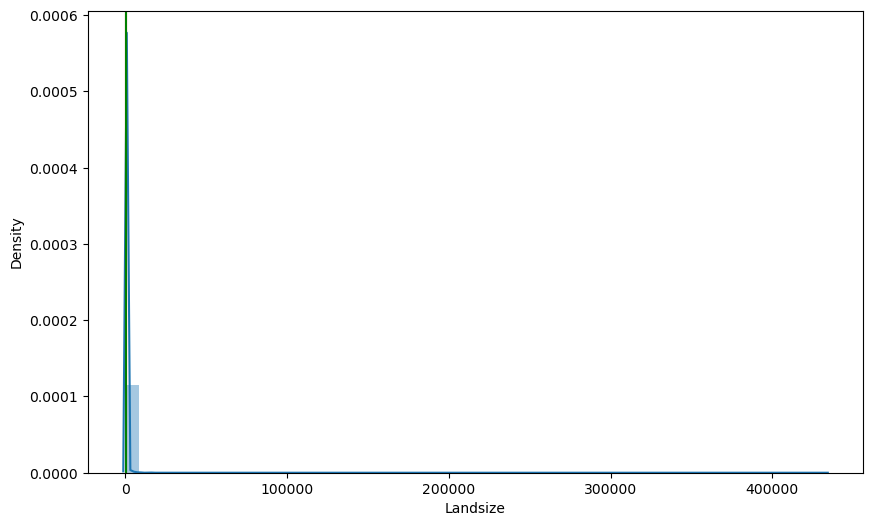

In [27]:
plt.figure(figsize=(10,6))
sns.distplot(df["Landsize"])
plt.axvline(df["Landsize"].mean(), color="red")
plt.axvline(df["Landsize"].median(), color="green")
plt.show()

In [28]:
df_not_null.groupby(["Type", "Car"], as_index=False)["Landsize"].median()

,Type,Car,Landsize
0,h,0.0,232.5
1,h,1.0,447.0
2,h,2.0,604.0
3,h,3.0,639.0
4,h,4.0,669.0
5,h,5.0,670.5
6,h,6.0,704.5
7,h,7.0,650.5
8,h,8.0,941.0
9,h,9.0,721.0


In [29]:
ls = []

for Type, Car in zip(df_null["Type"], df_null["Car"]):
    if Type == "h":
        if Car == 0:
            ls.append(235)
        elif Car == 1:
            ls.append(447)
        elif Car == 2:
            ls.append(604)
        elif Car == 3:
            ls.append(639)
        elif Car == 4:
            ls.append(669)
        elif Car == 5:
            ls.append(671)
        elif Car == 6:
            ls.append(704.5)
        elif Car == 7:
            ls.append(650.5)
        elif Car == 8:
            ls.append(232.5)
        elif Car == 9:
            ls.append(721)
        elif Car == 10:
            ls.append(993)
        elif Car == 11:
            ls.append(853.5)
        elif Car == 12:
            ls.append(835)
        elif Car == 18:
            ls.append(1250)
        else:
            ls.append(267)
    elif Type == "t":
        if Car == 0:
            ls.append(132)
        elif Car == 1:
            ls.append(156)
        elif Car == 2:
            ls.append(242)
        elif Car == 3:
            ls.append(281)
        else:
            ls.append(313)
    else:
        if Car in [0,1] == True:
            ls.append(0)
        elif Car in [2,3] == True:
            ls.append(180)
        elif Car == 4:
            ls.append(287)
        elif Car == 6:
            ls.append(335)
        elif Car == 7:
            ls.append(420)
        else:
            ls.append(309)

In [30]:
df_null["Landsize"]=ls

In [31]:
df = pd.concat([df_not_null, df_null])

In [32]:
df.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bathroom             0
Car                  0
Landsize             0
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

#### BUILDING AREA

In [33]:
print("Jumlah missing value :", df["BuildingArea"].isna().sum())
print("Presentase missing value :", round(df["BuildingArea"].isna().sum()/len(df)*100, 2), "%")

Jumlah missing value : 21115
Presentase missing value : 60.58 %


#### YEAR BUILT

In [34]:
print("Jumlah missing value :", df["YearBuilt"].isna().sum())
print("Presentase missing value :", round(df["YearBuilt"].isna().sum()/len(df)*100, 2), "%")

Jumlah missing value : 19306
Presentase missing value : 55.39 %


In [35]:
df = df.drop(columns=["BuildingArea", "YearBuilt", "Lattitude", "Longtitude", "Suburb", "Address", "SellerG", "Date"])

**Fill in the missing values with a little missing values with 0 or unknown**

In [36]:
df["Distance"] = df["Distance"].fillna(0)
df["Postcode"] = df["Postcode"].fillna(0)
df["CouncilArea"] = df["CouncilArea"].fillna("unknown")
df["Regionname"] = df["Regionname"].fillna("unknown")
df["Propertycount"] = df["Propertycount"].fillna(0)

In [37]:
df.isna().sum()

Rooms            0
Type             0
Price            0
Method           0
Distance         0
Postcode         0
Bathroom         0
Car              0
Landsize         0
CouncilArea      0
Regionname       0
Propertycount    0
dtype: int64

### OUTLIER IDENTIFICATION

### IDENTIFICATION IN VISUAL WITH BOX PLOT

### DETECTING OUTLIER WITH IQR

In [38]:
def find_outlier(data):
    Q1 = np.quantile(data, .25)
    Q3 = np.quantile(data, .75)
    
    IQR = Q3-Q1
    min_IQR = Q1-1.5*IQR
    max_IQR = Q3+1.5*IQR
    
    low_out =[]
    upper_out = []
    
    for i in data:
        if(i<min_IQR):
            low_out.append(i)
        if (i > max_IQR):
            upper_out.append(i)
    return low_out, upper_out

In [39]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.0,3.031012e+00,0.969933,1.0,2.0,3.0,4.0,16.0
Price,34857.0,1.035808e+06,582356.748479,85000.0,660000.0,928000.0,1210000.0,11200000.0
Distance,34857.0,1.118461e+01,6.789059,0.0,6.4,10.3,14.0,48.1
Postcode,34857.0,3.115973e+03,110.292487,0.0,3051.0,3103.0,3156.0,3978.0
Bathroom,34857.0,1.241358e+00,0.936326,0.0,1.0,1.0,2.0,12.0
Car,34857.0,1.295952e+00,1.151893,0.0,0.0,1.0,2.0,26.0
Landsize,34857.0,4.992350e+02,2768.226996,0.0,235.0,330.0,606.0,433014.0
Propertycount,34857.0,7.572237e+03,4428.457031,0.0,4385.0,6763.0,10412.0,21650.0


#### 1. ROOMS

In [40]:
lower_out = find_outlier(df["Rooms"])[0]
upper_out = find_outlier(df["Rooms"])[1]

In [41]:
print("Jumlah data :", len(df))
print("Jumlah outlier :", len(lower_out)+len(upper_out))
print("Presentase outlier :", round((len(lower_out)+len(upper_out))/len(df)*100, 2), "%")

Jumlah data : 34857
Jumlah outlier : 33
Presentase outlier : 0.09 %


In [42]:
df = df[df["Rooms"] < min(upper_out)]

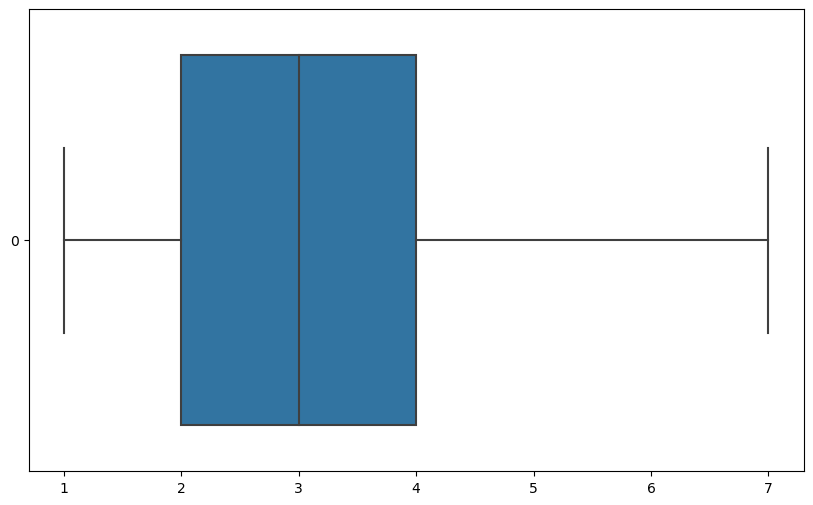

In [43]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df["Rooms"], orient="h")
plt.show()

#### 2. PRICE

In [44]:
lower_out = find_outlier(df["Price"])[0]
upper_out = find_outlier(df["Price"])[1]

In [45]:
print("Jumlah data :", len(df))
print("Jumlah outlier :", len(lower_out)+len(upper_out))
print("Presentase outlier :", round((len(lower_out)+len(upper_out))/len(df)*100, 2), "%")

Jumlah data : 34824
Jumlah outlier : 1780
Presentase outlier : 5.11 %


In [46]:
df = df[df["Price"] < min(upper_out)]

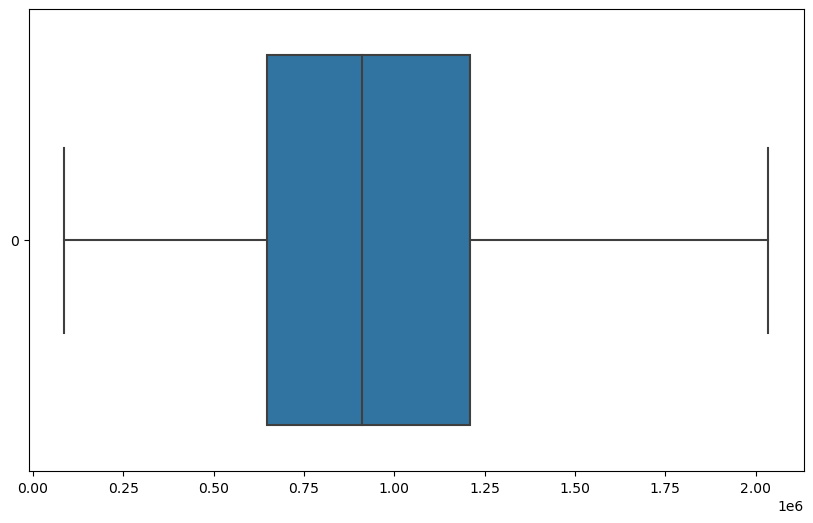

In [47]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df["Price"], orient="h")
plt.show()

#### 3. DISTANCE

In [48]:
lower_out = find_outlier(df["Distance"])[0]
upper_out = find_outlier(df["Distance"])[1]

In [49]:
print("Jumlah data :", len(df))
print("Jumlah outlier :", len(lower_out)+len(upper_out))
print("Presentase outlier :", round((len(lower_out)+len(upper_out))/len(df)*100, 2), "%")

Jumlah data : 33044
Jumlah outlier : 1269
Presentase outlier : 3.84 %


In [50]:
df = df[df["Distance"] < min(upper_out)]

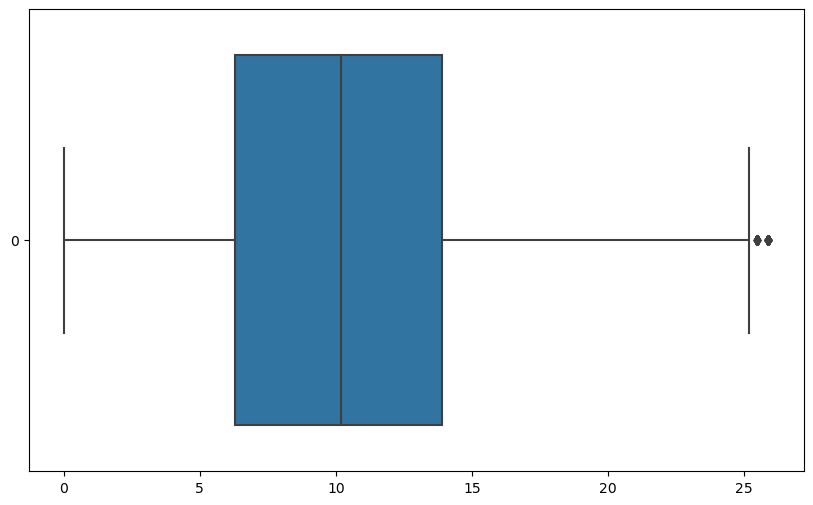

In [51]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df["Distance"], orient="h")
plt.show()

In [52]:
lower_out = find_outlier(df["Distance"])[0]
upper_out = find_outlier(df["Distance"])[1]

In [53]:
print("Jumlah data :", len(df))
print("Jumlah outlier :", len(lower_out)+len(upper_out))
print("Presentase outlier :", round((len(lower_out)+len(upper_out))/len(df)*100, 2), "%")

Jumlah data : 31775
Jumlah outlier : 195
Presentase outlier : 0.61 %


In [54]:
df = df[df["Distance"] < min(upper_out)]

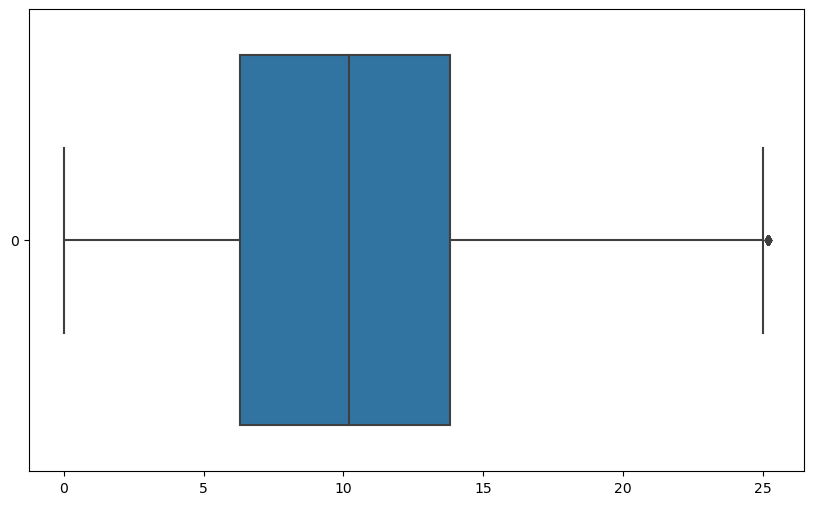

In [55]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df["Distance"], orient="h")
plt.show()

In [56]:
lower_out = find_outlier(df["Distance"])[0]
upper_out = find_outlier(df["Distance"])[1]

In [57]:
print("Jumlah data :", len(df))
print("Jumlah outlier :", len(lower_out)+len(upper_out))
print("Presentase outlier :", round((len(lower_out)+len(upper_out))/len(df)*100, 2), "%")

Jumlah data : 31580
Jumlah outlier : 44
Presentase outlier : 0.14 %


In [58]:
df = df[df["Distance"] < min(upper_out)]

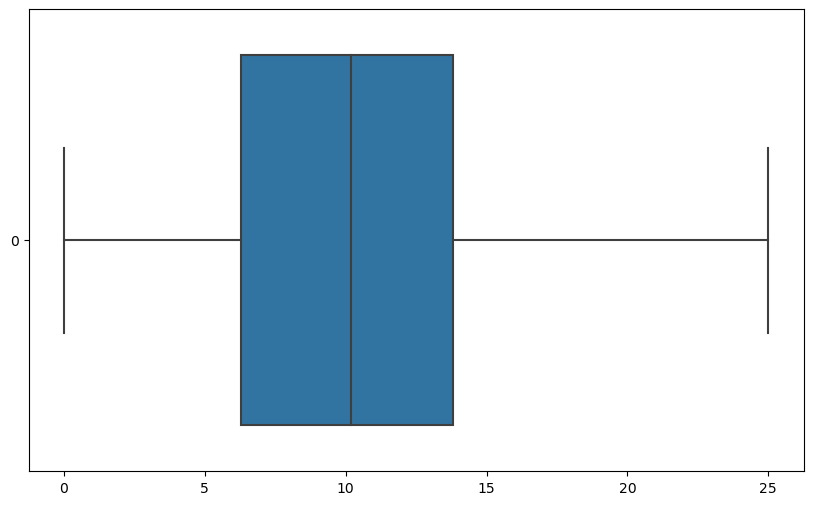

In [59]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df["Distance"], orient="h")
plt.show()

#### 4. BATHROOM

In [60]:
lower_out = find_outlier(df["Bathroom"])[0]
upper_out = find_outlier(df["Bathroom"])[1]

In [61]:
print("Jumlah data :", len(df))
print("Jumlah outlier :", len(lower_out)+len(upper_out))
print("Presentase outlier :", round((len(lower_out)+len(upper_out))/len(df)*100, 2), "%")

Jumlah data : 31536
Jumlah outlier : 202
Presentase outlier : 0.64 %


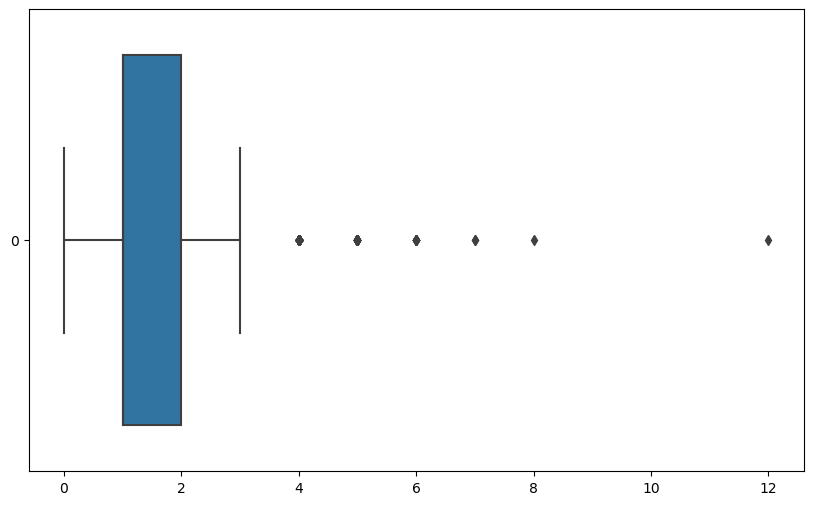

In [62]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df["Bathroom"], orient="h")
plt.show()

In [63]:
iqr = df["Bathroom"].quantile(.75) - df["Bathroom"].quantile(.25)
up_limit = df["Bathroom"].quantile(.75)+1.5*iqr
print("Upper Limit :", up_limit)

Upper Limit : 3.5


In [64]:
df["Bathroom"].quantile(0.99)

3.0

In [65]:
df1 = df.copy()
df1["Bathroom_fin"] = stats.mstats.winsorize(df["Bathroom"], limits=(0, .01))

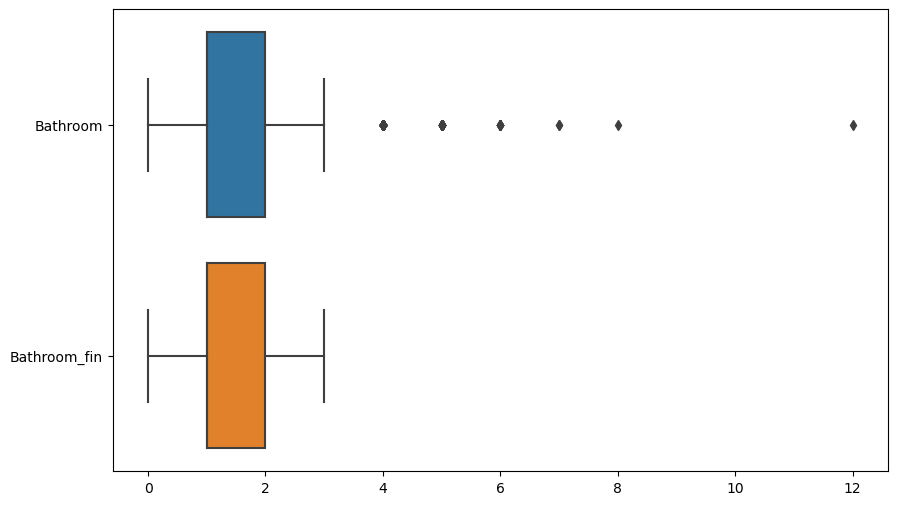

In [66]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df1[["Bathroom", "Bathroom_fin"]], orient="h")
plt.show()

In [67]:
df1 = df

#### 7. CAR

In [68]:
lower_out = find_outlier(df["Car"])[0]
upper_out = find_outlier(df["Car"])[1]

In [69]:
print("Jumlah data :", len(df))
print("Jumlah outlier :", len(lower_out)+len(upper_out))
print("Presentase outlier :", round((len(lower_out)+len(upper_out))/len(df)*100, 2), "%")

Jumlah data : 31536
Jumlah outlier : 156
Presentase outlier : 0.49 %


In [70]:
iqr = df["Car"].quantile(.75) - df["Car"].quantile(.25)
up_limit = df["Car"].quantile(.75)+1.5*iqr
print("Upper Limit :", up_limit)

Upper Limit : 5.0


In [71]:
df["Car"].quantile(0.99)

4.0

In [72]:
df1 = df.copy()
df1["Car_fin"] = stats.mstats.winsorize(df["Car"], limits=(0, .01))

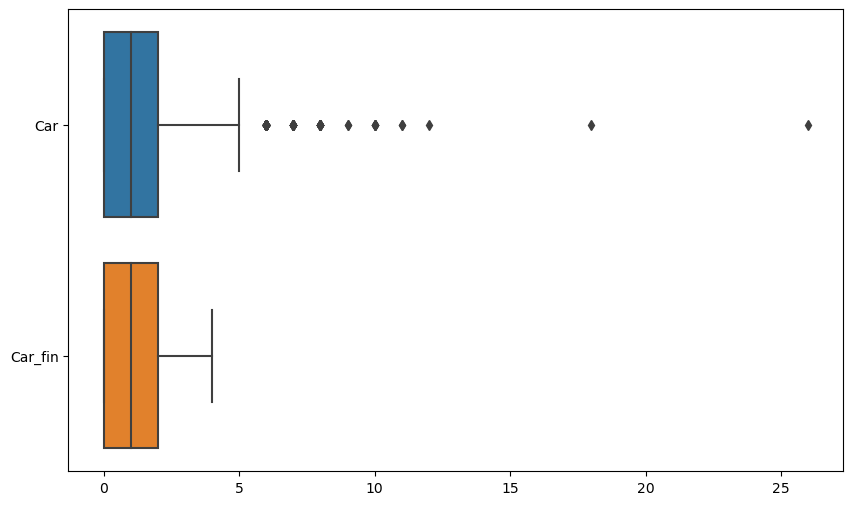

In [73]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df1[["Car", "Car_fin"]], orient="h")
plt.show()

In [74]:
df1 = df

#### 8. LANDSIZE

In [75]:
lower_out = find_outlier(df["Landsize"])[0]
upper_out = find_outlier(df["Landsize"])[1]

In [76]:
print("Jumlah data :", len(df))
print("Jumlah outlier :", len(lower_out)+len(upper_out))
print("Presentase outlier :", round((len(lower_out)+len(upper_out))/len(df)*100, 2), "%")

Jumlah data : 31536
Jumlah outlier : 606
Presentase outlier : 1.92 %


In [77]:
df = df[df["Landsize"] < min(upper_out)]

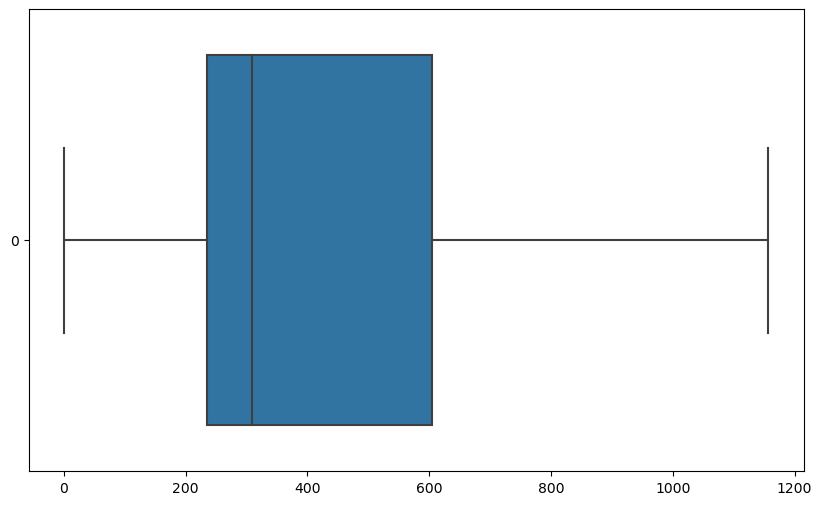

In [78]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df["Landsize"], orient="h")
plt.show()

#### 9. PROPERTYCOUNT

In [79]:
lower_out = find_outlier(df["Propertycount"])[0]
upper_out = find_outlier(df["Propertycount"])[1]

In [80]:
print("Jumlah data :", len(df))
print("Jumlah outlier :", len(lower_out)+len(upper_out))
print("Presentase outlier :", round((len(lower_out)+len(upper_out))/len(df)*100, 2), "%")

Jumlah data : 30930
Jumlah outlier : 840
Presentase outlier : 2.72 %


In [81]:
df = df[df["Propertycount"] < min(upper_out)]

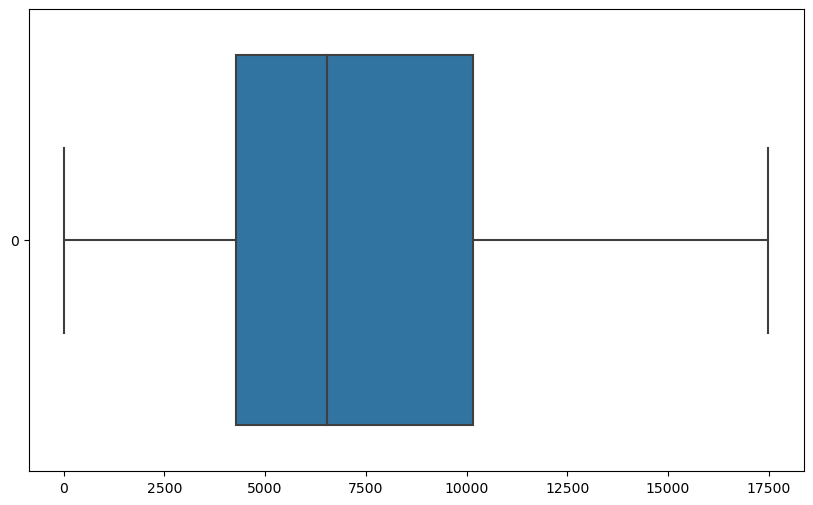

In [82]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df["Propertycount"], orient="h")
plt.show()

In [83]:
df1 = []
for i in df.columns:
    df1.append([i, df[i].isna().sum(), df[i].nunique(), df[i].drop_duplicates().values])

df2 = pd.DataFrame(df1, columns=["column", "null values", "unique number", "values"])
df2

,column,null values,unique number,values
0,Rooms,0,7,"[2, 3, 4, 1, 6, 5, 7]"
1,Type,0,3,"[h, u, t]"
2,Price,0,2312,"[1480000.0, 1035000.0, 1465000.0, 850000.0, 16..."
3,Method,0,9,"[S, SP, PI, VB, SA, SS, SN, W, PN]"
4,Distance,0,166,"[2.5, 13.5, 3.3, 6.4, 13.8, 11.1, 6.3, 5.9, 11..."
5,Postcode,0,156,"[3067.0, 3042.0, 3206.0, 3078.0, 3018.0, 3025...."
6,Bathroom,0,9,"[1.0, 2.0, 3.0, 0.0, 5.0, 4.0, 6.0, 7.0, 12.0]"
7,Car,0,14,"[1.0, 0.0, 2.0, 6.0, 5.0, 4.0, 3.0, 8.0, 7.0, ..."
8,Landsize,0,1095,"[202.0, 156.0, 134.0, 94.0, 120.0, 181.0, 245...."
9,CouncilArea,0,27,"[Yarra City Council, Moonee Valley City Counci..."


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30090 entries, 1 to 34829
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          30090 non-null  int64  
 1   Type           30090 non-null  object 
 2   Price          30090 non-null  float64
 3   Method         30090 non-null  object 
 4   Distance       30090 non-null  float64
 5   Postcode       30090 non-null  float64
 6   Bathroom       30090 non-null  float64
 7   Car            30090 non-null  float64
 8   Landsize       30090 non-null  float64
 9   CouncilArea    30090 non-null  object 
 10  Regionname     30090 non-null  object 
 11  Propertycount  30090 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 4.0+ MB


### FEATURE BINNING

**PRICE**

In [85]:
df["Price"].describe()

count    3.009000e+04
mean     9.595706e+05
std      3.790291e+05
min      8.500000e+04
25%      6.656250e+05
50%      9.280000e+05
75%      1.210000e+06
max      2.035000e+06
Name: Price, dtype: float64

In [86]:
df1 = df.copy()

In [87]:
cut_labels = ["Very Cheap", "Cheap", "Expensive", "Very Expensive"]

cut_bins = [0, 500000, 1000000, 1500000, 2500000]

df1["cut_price"] = pd.cut(df1["Price"], bins=cut_bins, labels = cut_labels)
df1.head()

,Rooms,Type,Price,Method,Distance,Postcode,Bathroom,Car,Landsize,CouncilArea,Regionname,Propertycount,cut_price
1,2,h,1480000.0,S,2.5,3067.0,1.0,1.0,202.0,Yarra City Council,Northern Metropolitan,4019.0,Expensive
2,2,h,1035000.0,S,2.5,3067.0,1.0,0.0,156.0,Yarra City Council,Northern Metropolitan,4019.0,Expensive
4,3,h,1465000.0,SP,2.5,3067.0,2.0,0.0,134.0,Yarra City Council,Northern Metropolitan,4019.0,Expensive
5,3,h,850000.0,PI,2.5,3067.0,2.0,1.0,94.0,Yarra City Council,Northern Metropolitan,4019.0,Cheap
6,4,h,1600000.0,VB,2.5,3067.0,1.0,2.0,120.0,Yarra City Council,Northern Metropolitan,4019.0,Very Expensive


In [88]:
df1.head()

,Rooms,Type,Price,Method,Distance,Postcode,Bathroom,Car,Landsize,CouncilArea,Regionname,Propertycount,cut_price
1,2,h,1480000.0,S,2.5,3067.0,1.0,1.0,202.0,Yarra City Council,Northern Metropolitan,4019.0,Expensive
2,2,h,1035000.0,S,2.5,3067.0,1.0,0.0,156.0,Yarra City Council,Northern Metropolitan,4019.0,Expensive
4,3,h,1465000.0,SP,2.5,3067.0,2.0,0.0,134.0,Yarra City Council,Northern Metropolitan,4019.0,Expensive
5,3,h,850000.0,PI,2.5,3067.0,2.0,1.0,94.0,Yarra City Council,Northern Metropolitan,4019.0,Cheap
6,4,h,1600000.0,VB,2.5,3067.0,1.0,2.0,120.0,Yarra City Council,Northern Metropolitan,4019.0,Very Expensive


**DISTANCE**

In [89]:
df1["Distance"].describe()

count    30090.000000
mean        10.384294
std          5.235868
min          0.000000
25%          6.300000
50%         10.100000
75%         13.900000
max         25.000000
Name: Distance, dtype: float64

In [90]:
cut_labels = ["Very Close", "Close", "Standard", "Far", "So Far"]

cut_bins = [0, 5, 10, 15, 20, 25]

df1["cut_distance"] = pd.cut(df1["Distance"], bins=cut_bins, labels = cut_labels)
df1.head()

,Rooms,Type,Price,Method,Distance,Postcode,Bathroom,Car,Landsize,CouncilArea,Regionname,Propertycount,cut_price,cut_distance
1,2,h,1480000.0,S,2.5,3067.0,1.0,1.0,202.0,Yarra City Council,Northern Metropolitan,4019.0,Expensive,Very Close
2,2,h,1035000.0,S,2.5,3067.0,1.0,0.0,156.0,Yarra City Council,Northern Metropolitan,4019.0,Expensive,Very Close
4,3,h,1465000.0,SP,2.5,3067.0,2.0,0.0,134.0,Yarra City Council,Northern Metropolitan,4019.0,Expensive,Very Close
5,3,h,850000.0,PI,2.5,3067.0,2.0,1.0,94.0,Yarra City Council,Northern Metropolitan,4019.0,Cheap,Very Close
6,4,h,1600000.0,VB,2.5,3067.0,1.0,2.0,120.0,Yarra City Council,Northern Metropolitan,4019.0,Very Expensive,Very Close


**LANDSIZE**

In [91]:
df1["Landsize"].describe()

count    30090.000000
mean       388.162180
std        242.903218
min          0.000000
25%        235.000000
50%        309.000000
75%        604.000000
max       1157.000000
Name: Landsize, dtype: float64

In [92]:
cut_labels = ["Very Small", "Small", "Big", "Very Big"]

cut_bins = [0, 300, 600, 900, 1200]

df1["cut_landsize"] = pd.cut(df1["Landsize"], bins=cut_bins, labels = cut_labels)
df1.head()

,Rooms,Type,Price,Method,Distance,Postcode,Bathroom,Car,Landsize,CouncilArea,Regionname,Propertycount,cut_price,cut_distance,cut_landsize
1,2,h,1480000.0,S,2.5,3067.0,1.0,1.0,202.0,Yarra City Council,Northern Metropolitan,4019.0,Expensive,Very Close,Very Small
2,2,h,1035000.0,S,2.5,3067.0,1.0,0.0,156.0,Yarra City Council,Northern Metropolitan,4019.0,Expensive,Very Close,Very Small
4,3,h,1465000.0,SP,2.5,3067.0,2.0,0.0,134.0,Yarra City Council,Northern Metropolitan,4019.0,Expensive,Very Close,Very Small
5,3,h,850000.0,PI,2.5,3067.0,2.0,1.0,94.0,Yarra City Council,Northern Metropolitan,4019.0,Cheap,Very Close,Very Small
6,4,h,1600000.0,VB,2.5,3067.0,1.0,2.0,120.0,Yarra City Council,Northern Metropolitan,4019.0,Very Expensive,Very Close,Very Small


### FEATURE SCALLING

In [93]:
scal = MinMaxScaler()

In [94]:
df1["price_minmax"] = scal.fit_transform(df1[["Price"]])
df1["landsize_minmax"] = scal.fit_transform(df1[["Landsize"]])

In [95]:
df1.head()

,Rooms,Type,Price,Method,Distance,Postcode,Bathroom,Car,Landsize,CouncilArea,Regionname,Propertycount,cut_price,cut_distance,cut_landsize,price_minmax,landsize_minmax
1,2,h,1480000.0,S,2.5,3067.0,1.0,1.0,202.0,Yarra City Council,Northern Metropolitan,4019.0,Expensive,Very Close,Very Small,0.715385,0.174589
2,2,h,1035000.0,S,2.5,3067.0,1.0,0.0,156.0,Yarra City Council,Northern Metropolitan,4019.0,Expensive,Very Close,Very Small,0.487179,0.134831
4,3,h,1465000.0,SP,2.5,3067.0,2.0,0.0,134.0,Yarra City Council,Northern Metropolitan,4019.0,Expensive,Very Close,Very Small,0.707692,0.115817
5,3,h,850000.0,PI,2.5,3067.0,2.0,1.0,94.0,Yarra City Council,Northern Metropolitan,4019.0,Cheap,Very Close,Very Small,0.392308,0.081245
6,4,h,1600000.0,VB,2.5,3067.0,1.0,2.0,120.0,Yarra City Council,Northern Metropolitan,4019.0,Very Expensive,Very Close,Very Small,0.776923,0.103717


### FEATURE ENCODING

In [96]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30090 entries, 1 to 34829
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Rooms            30090 non-null  int64   
 1   Type             30090 non-null  object  
 2   Price            30090 non-null  float64 
 3   Method           30090 non-null  object  
 4   Distance         30090 non-null  float64 
 5   Postcode         30090 non-null  float64 
 6   Bathroom         30090 non-null  float64 
 7   Car              30090 non-null  float64 
 8   Landsize         30090 non-null  float64 
 9   CouncilArea      30090 non-null  object  
 10  Regionname       30090 non-null  object  
 11  Propertycount    30090 non-null  float64 
 12  cut_price        30090 non-null  category
 13  cut_distance     30014 non-null  category
 14  cut_landsize     27700 non-null  category
 15  price_minmax     30090 non-null  float64 
 16  landsize_minmax  30090 non-null  float64

In [101]:
for i in df1.columns[df1.dtypes == object]:
    df1[i] = LabelEncoder().fit_transform(df1[i])

In [102]:
df1.head()

,Rooms,Type,Price,Method,Distance,Postcode,Bathroom,Car,Landsize,CouncilArea,Regionname,Propertycount,cut_price,cut_distance,cut_landsize,price_minmax,landsize_minmax,type_enc
1,2,0,1480000.0,2,2.5,3067.0,1.0,1.0,202.0,25,1,4019.0,Expensive,Very Close,Very Small,0.715385,0.174589,0
2,2,0,1035000.0,2,2.5,3067.0,1.0,0.0,156.0,25,1,4019.0,Expensive,Very Close,Very Small,0.487179,0.134831,0
4,3,0,1465000.0,5,2.5,3067.0,2.0,0.0,134.0,25,1,4019.0,Expensive,Very Close,Very Small,0.707692,0.115817,0
5,3,0,850000.0,0,2.5,3067.0,2.0,1.0,94.0,25,1,4019.0,Cheap,Very Close,Very Small,0.392308,0.081245,0
6,4,0,1600000.0,7,2.5,3067.0,1.0,2.0,120.0,25,1,4019.0,Very Expensive,Very Close,Very Small,0.776923,0.103717,0


In [103]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30090 entries, 1 to 34829
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Rooms            30090 non-null  int64   
 1   Type             30090 non-null  int32   
 2   Price            30090 non-null  float64 
 3   Method           30090 non-null  int32   
 4   Distance         30090 non-null  float64 
 5   Postcode         30090 non-null  float64 
 6   Bathroom         30090 non-null  float64 
 7   Car              30090 non-null  float64 
 8   Landsize         30090 non-null  float64 
 9   CouncilArea      30090 non-null  int32   
 10  Regionname       30090 non-null  int32   
 11  Propertycount    30090 non-null  float64 
 12  cut_price        30090 non-null  category
 13  cut_distance     30014 non-null  category
 14  cut_landsize     27700 non-null  category
 15  price_minmax     30090 non-null  float64 
 16  landsize_minmax  30090 non-null  float64

<AxesSubplot:>

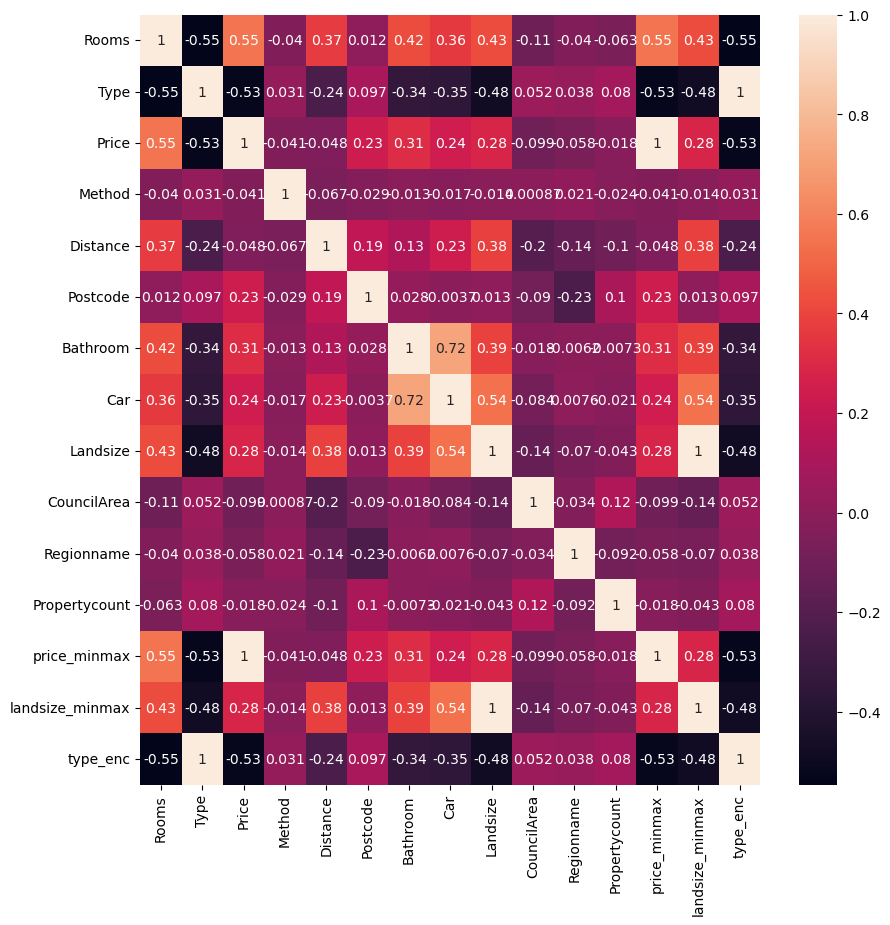

In [107]:
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr("spearman"), annot=True)